<a href="https://colab.research.google.com/github/odenmehmet/DL_Project/blob/main/Konvol%C3%BCsyonel_Sinir_A%C4%9Flar%C4%B1_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# CIFAR-10'u indir
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalizasyon (0-1 aralığına çekiyoruz)
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Sınıf isimleri
class_names = ['uçak','araba','kuş','kedi','geyik','köpek','kurbağa','at','gemi','kamyon']


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


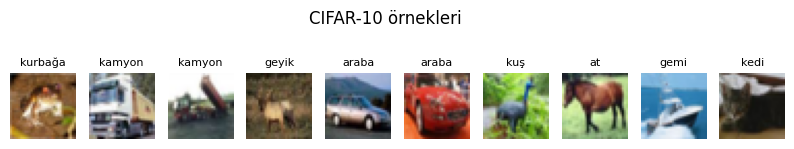

In [2]:
plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
    plt.title(class_names[y_train[i][0]], fontsize=8)
plt.suptitle("CIFAR-10 örnekleri")
plt.show()


In [3]:
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
])

model = keras.Sequential([
    data_augmentation,
    keras.layers.Conv2D(32, (3,3), padding="same", activation='relu', input_shape=(32,32,3)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3,3), padding="same", activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, (3,3), padding="same", activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3,3), padding="same", activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128, (3,3), padding="same", activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, (3,3), padding="same", activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [5]:
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

lr_scheduler = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1
)


In [6]:
history = model.fit(
    x_train, y_train,
    epochs=50,                     # Fazla epoch koyabilirsin, early stopping erken bitirecek
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stop, lr_scheduler],
    verbose=2
)


Epoch 1/50
704/704 - 30s - 43ms/step - accuracy: 0.3298 - loss: 1.9714 - val_accuracy: 0.4152 - val_loss: 1.6246 - learning_rate: 1.0000e-03
Epoch 2/50
704/704 - 34s - 48ms/step - accuracy: 0.4732 - loss: 1.4572 - val_accuracy: 0.4664 - val_loss: 1.6748 - learning_rate: 1.0000e-03
Epoch 3/50
704/704 - 20s - 28ms/step - accuracy: 0.5403 - loss: 1.2876 - val_accuracy: 0.5694 - val_loss: 1.3353 - learning_rate: 1.0000e-03
Epoch 4/50
704/704 - 21s - 30ms/step - accuracy: 0.5865 - loss: 1.1758 - val_accuracy: 0.6154 - val_loss: 1.1120 - learning_rate: 1.0000e-03
Epoch 5/50
704/704 - 21s - 29ms/step - accuracy: 0.6250 - loss: 1.0844 - val_accuracy: 0.6752 - val_loss: 0.9201 - learning_rate: 1.0000e-03
Epoch 6/50
704/704 - 21s - 29ms/step - accuracy: 0.6485 - loss: 1.0198 - val_accuracy: 0.6350 - val_loss: 1.0519 - learning_rate: 1.0000e-03
Epoch 7/50
704/704 - 20s - 29ms/step - accuracy: 0.6702 - loss: 0.9730 - val_accuracy: 0.7072 - val_loss: 0.8588 - learning_rate: 1.0000e-03
Epoch 8/50
70

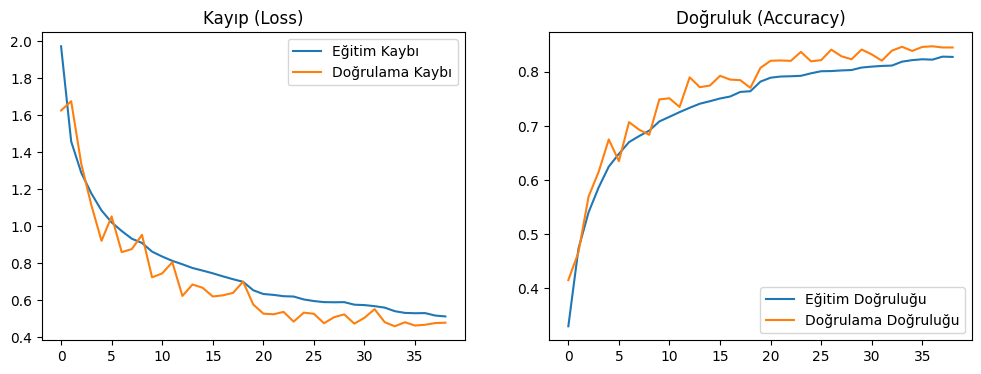

In [7]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.legend(); plt.title('Kayıp (Loss)')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.legend(); plt.title('Doğruluk (Accuracy)')
plt.show()


Test doğruluğu: 84.14%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


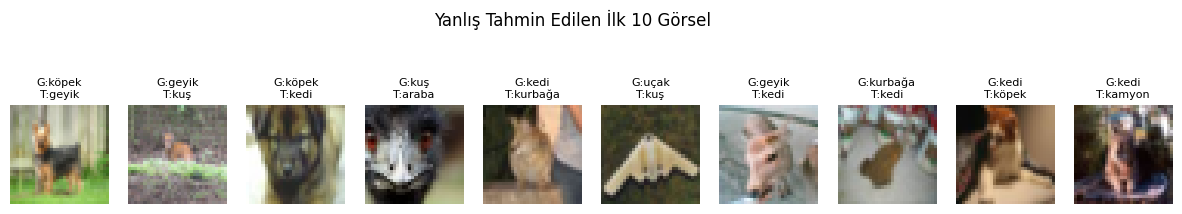

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Test doğruluğu: {test_acc*100:.2f}%')

# Tahminler
pred_probs = model.predict(x_test)
pred_labels = np.argmax(pred_probs, axis=1)

# Yanlış tahminleri görselleştir
wrong_indices = np.where(pred_labels != y_test.flatten())[0]
plt.figure(figsize=(15,3))
for i, idx in enumerate(wrong_indices[:10]):
    plt.subplot(1,10,i+1)
    plt.imshow(x_test[idx])
    plt.axis('off')
    plt.title(f"G:{class_names[y_test[idx][0]]}\nT:{class_names[pred_labels[idx]]}", fontsize=8)
plt.suptitle("Yanlış Tahmin Edilen İlk 10 Görsel")
plt.show()


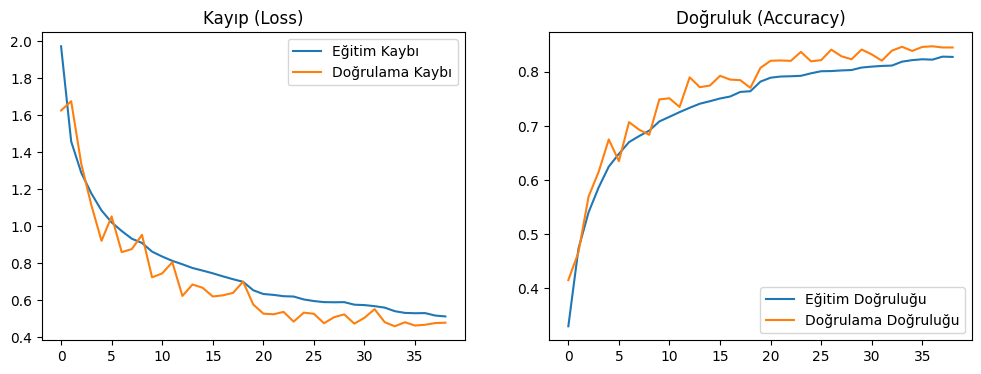

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.legend(); plt.title('Kayıp (Loss)')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.legend(); plt.title('Doğruluk (Accuracy)')
plt.show()


In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Test doğruluğu: {test_acc*100:.2f}%')


Test doğruluğu: 84.14%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


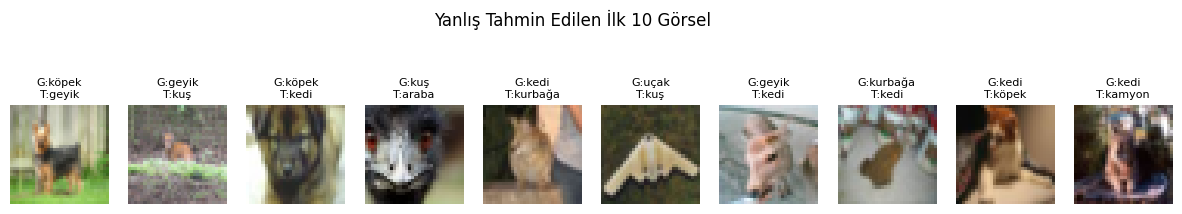

In [11]:
import numpy as np

pred_probs = model.predict(x_test)
pred_labels = np.argmax(pred_probs, axis=1)
wrong_indices = np.where(pred_labels != y_test.flatten())[0]

plt.figure(figsize=(15,3))
for i, idx in enumerate(wrong_indices[:10]):
    plt.subplot(1,10,i+1)
    plt.imshow(x_test[idx])
    plt.axis('off')
    plt.title(f"G:{class_names[y_test[idx][0]]}\nT:{class_names[pred_labels[idx]]}", fontsize=8)
plt.suptitle("Yanlış Tahmin Edilen İlk 10 Görsel")
plt.show()
